In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import tools
from imp import reload
reload(tools)
from tools import syn_registration
%matplotlib inline

In [2]:
import nibabel as nib
import dipy.data as dpd

In [3]:
ni, gtab = dpd.read_stanford_hardi()

In [4]:
hardi_data = ni.get_data()
hardi_affine = ni.get_affine()

In [5]:
b0 = hardi_data[..., gtab.b0s_mask]

In [6]:
mean_b0 = np.mean(b0, -1)

In [7]:
ni_b0 = nib.Nifti1Image(mean_b0, hardi_affine)

In [8]:
ni_b0.to_filename('mean_b0.nii')

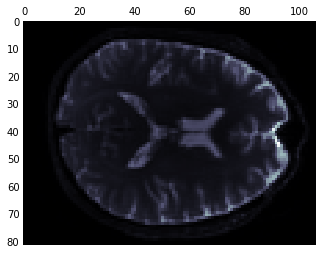

In [9]:
plt.matshow(mean_b0[:,:,mean_b0.shape[-1]//2], cmap=cm.bone)

In [10]:
MNI_T2 = nib.load('/Users/arokem/source/AFQ/templates/mni_icbm152_nlin_asym_09a_nifti/mni_icbm152_t2_tal_nlin_asym_09a.nii')

In [11]:
MNI_T2_data = MNI_T2.get_data()

In [12]:
MNI_T2_affine = MNI_T2.get_affine()

In [13]:
warped_b0, mapping = syn_registration(mean_b0, MNI_T2_data, moving_grid2world=hardi_affine, static_grid2world=MNI_T2_affine, 
                                     metric='CC', dim=3, level_iters = [10, 10, 5], prealign=None)

Creating scale space from the moving image. Levels: 3. Sigma factor: 0.200000.
Creating scale space from the static image. Levels: 3. Sigma factor: 0.200000.
Optimizing level 2
Optimizing level 1
Optimizing level 0


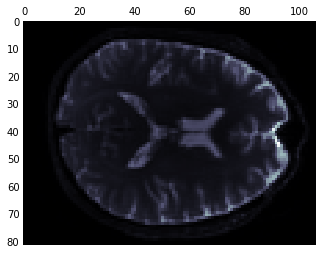

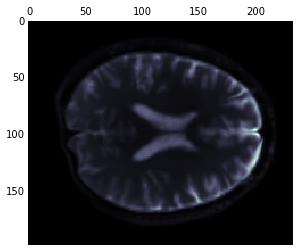

In [14]:
plt.matshow(mean_b0[:,:,mean_b0.shape[-1]//2], cmap=cm.bone)
plt.matshow(warped_b0[:,:,warped_b0.shape[-1]//2], cmap=cm.bone)

In [15]:
new_ni = nib.Nifti1Image(warped_b0, MNI_T2_affine)

In [16]:
new_ni.to_filename('./warped_b0.nii.gz')

In [17]:
LOCC_ni = nib.load('/Users/arokem/source/AFQ/templates/callosum2/L_Occipital.nii.gz')
ROCC_ni = nib.load('/Users/arokem/source/AFQ/templates/callosum2/R_Occipital.nii.gz')
midsag_ni = nib.load('/Users/arokem/source/AFQ/templates/callosum2/R_Occipital.nii.gz')

In [18]:
LOCC_data = LOCC_ni.get_data()
ROCC_data = ROCC_ni.get_data()
midsag_data = midsag_ni.get_data()

In [19]:
midsag_affine = midsag_ni.get_affine()

In [20]:
midsag_affine

array([[   1.,    0.,    0.,  -98.],
       [   0.,    1.,    0., -134.],
       [   0.,    0.,    1.,  -72.],
       [   0.,    0.,    0.,    1.]])

In [21]:
MNI_T2.shape

(197, 233, 189)

In [22]:
LOCC_ni.shape

(197, 233, 189)

In [23]:
LOCC_ni.get_affine()

array([[   1.,    0.,    0.,  -98.],
       [   0.,    1.,    0., -134.],
       [   0.,    0.,    1.,  -72.],
       [   0.,    0.,    0.,    1.]])

In [24]:
MNI_T2_affine

array([[   1.,    0.,    0.,  -98.],
       [   0.,    1.,    0., -134.],
       [   0.,    0.,    1.,  -72.],
       [   0.,    0.,    0.,    1.]])

In [25]:
warped_LOCC = mapping.transform_inverse(LOCC_data)

In [26]:
bin_warped_LOCC = np.ceil(warped_LOCC)

In [27]:
im = np.sum(np.ceil(bin_warped_LOCC), axis=1)

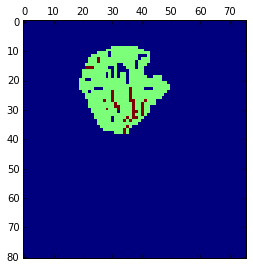

In [28]:
plt.matshow(im)

In [29]:
import scipy.ndimage as ndim

In [30]:
ndim.binary_fill_holes

<function scipy.ndimage.morphology.binary_fill_holes>

In [31]:
#filled_warped_LOCC= ndim.binary_dilation(bin_warped_LOCC, iterations=1).astype(int)
filled_warped_LOCC= ndim.binary_fill_holes(bin_warped_LOCC.astype(int)).astype(int)

In [32]:
np.unique(filled_warped_LOCC)

array([0, 1])

In [56]:
filled_warped_LOCC_ni = nib.Nifti1Image(filled_warped_LOCC, hardi_affine)

In [57]:
filled_warped_LOCC_ni.to_filename('./warped_LOCC.nii.gz')

In [35]:
im = np.sum(np.ceil(ndim.binary_fill_holes(filled_warped_LOCC)), axis=1)

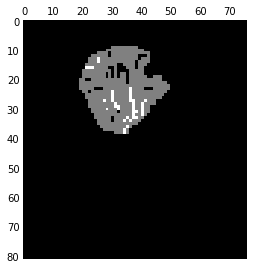

In [36]:
plt.matshow(im, cmap=cm.gray)

In [37]:
sl = nib.trackvis.read('./tensor_streamlines.trk', points_space='voxel')

In [50]:
sl[0][0]

(array([[ 26.4841423 ,  38.62833023,  55.76271439],
        [ 26.57774162,  38.49172211,  55.29093552],
        [ 26.64459229,  38.38281631,  54.80754089],
        [ 26.67384911,  38.28636551,  54.31780243],
        [ 26.67930412,  38.199646  ,  53.82541275],
        [ 26.65811348,  38.11829758,  53.33252716],
        [ 26.60972404,  38.04495239,  52.84030914],
        [ 26.54303741,  37.99626923,  52.3471756 ],
        [ 26.45503044,  37.96047974,  51.8562851 ],
        [ 26.32678413,  37.92443085,  51.37435532],
        [ 26.16465759,  37.89036942,  50.90259933],
        [ 25.99437714,  37.88658905,  50.43250275],
        [ 25.81068993,  37.91730118,  49.96848297],
        [ 25.60430717,  37.9600296 ,  49.51507187],
        [ 25.38165474,  38.02501678,  49.07212448],
        [ 25.16344643,  38.09794235,  48.62820435],
        [ 24.94886398,  38.17311859,  48.18289185],
        [ 24.7429409 ,  38.25121307,  47.73400497],
        [ 24.54547119,  38.33713531,  47.28276062],
        [ 24

In [38]:
import dipy.tracking.streamline as dts

In [45]:
select_sl = dts.select_by_roi(sl, [warped_LOCC.astype(bool)], [True], affine=filled_warped_LOCC_ni.get_affine())

In [46]:
select_sl.next()

ValueError: setting an array element with a sequence.

In [ ]:
len(sl)

In [47]:
debug

> /Users/arokem/anaconda/envs/py2/lib/python2.7/site-packages/scipy/spatial/distance.py(113)_convert_to_double()
    112     if X.dtype != np.double:
--> 113         X = X.astype(np.double)
    114     if not X.flags.contiguous:

ipdb> u
> /Users/arokem/anaconda/envs/py2/lib/python2.7/site-packages/scipy/spatial/distance.py(2002)cdist()
   2001     # The C code doesn't do striding.
-> 2002     [XA] = _copy_arrays_if_base_present([_convert_to_double(XA)])
   2003     [XB] = _copy_arrays_if_base_present([_convert_to_double(XB)])

ipdb> u
> /Users/arokem/source/dipy/dipy/tracking/utils.py(616)streamline_near_roi()
    615 
--> 616     dist = cdist(s, x_roi_coords, 'euclidean')
    617 

ipdb> p x_roi_coords
array([[ -89., -105.,  -42.],
       [ -89., -105.,  -41.],
       [ -89., -105.,  -40.],
       ..., 
       [ -60., -105.,  -40.],
       [ -60., -105.,  -39.],
       [ -60., -105.,  -38.]])
ipdb> q


In [ ]:
sl[0][0]